In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection, preprocessing
import seaborn as sns
import xgboost as xgb
import datetime

train = pd.read_csv("input/train.csv.zip", compression="zip", delimiter=",")
test = pd.read_csv("input/test.csv.zip", compression="zip", delimiter=",")
macro = pd.read_csv("input/macro.csv.zip", compression="zip", delimiter=",")

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



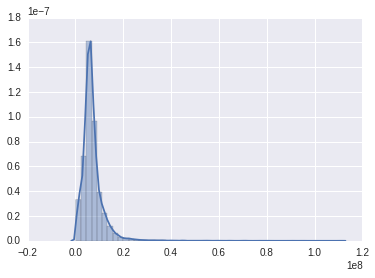

In [87]:
sns.distplot(train["price_doc"].values)

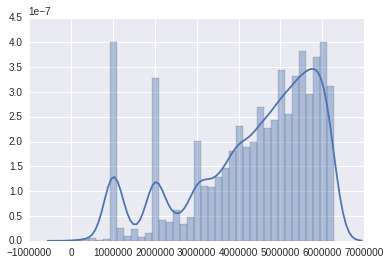

In [88]:
sns.distplot(train[train["price_doc"] <= 6283459]["price_doc"].values)

In [89]:
max(train["price_doc"])

111111112

In [90]:
min(train["price_doc"])

100000

In [91]:
np.mean(train["price_doc"])

7123035.2777394904

In [92]:
train["timestamp"].apply( lambda x: str(x)[:4]).unique()

array(['2011', '2012', '2013', '2014', '2015'], dtype=object)

In [93]:
train["timestamp"] = pd.to_datetime(train["timestamp"])
train["timestamp"].apply( lambda x: str(x)[:4]).unique()

array(['2011', '2012', '2013', '2014', '2015'], dtype=object)

In [94]:
train["day"] = train["timestamp"].dt.day

In [95]:
train["month"] = train["timestamp"].dt.month

In [96]:
train["year"] = train["timestamp"].dt.year
train["year"].unique()

array([2011, 2012, 2013, 2014, 2015])

In [97]:
train['yearmonth'] = train['timestamp'].apply(lambda x: str(x)[:4]+str(x)[5:7])

In [98]:
test["timestamp"] = pd.to_datetime(test["timestamp"])
test["year"], test["month"], test["day"] = test["timestamp"].dt.year,test["timestamp"].dt.month,test["timestamp"].dt.day
test['yearmonth'] = test['timestamp'].apply(lambda x: str(x)[:4]+str(x)[5:7])

In [99]:
train["count"] = 1

In [106]:
count_year_train = train.groupby("year").count().reset_index()

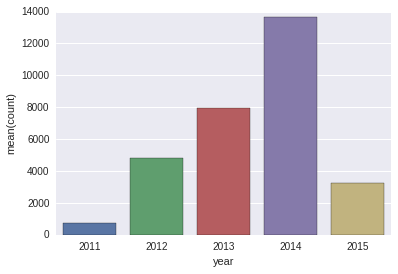

In [107]:
sns.barplot(count_year_train["year"], count_year["count"])

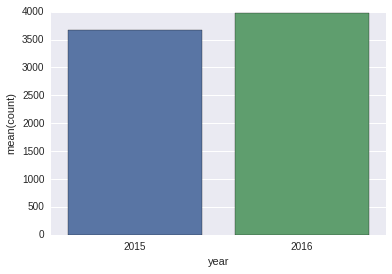

In [111]:
test["count"] = 1
count_year_test = test.groupby("year").count().reset_index()
sns.barplot(count_year_test["year"], count_year_test["count"])

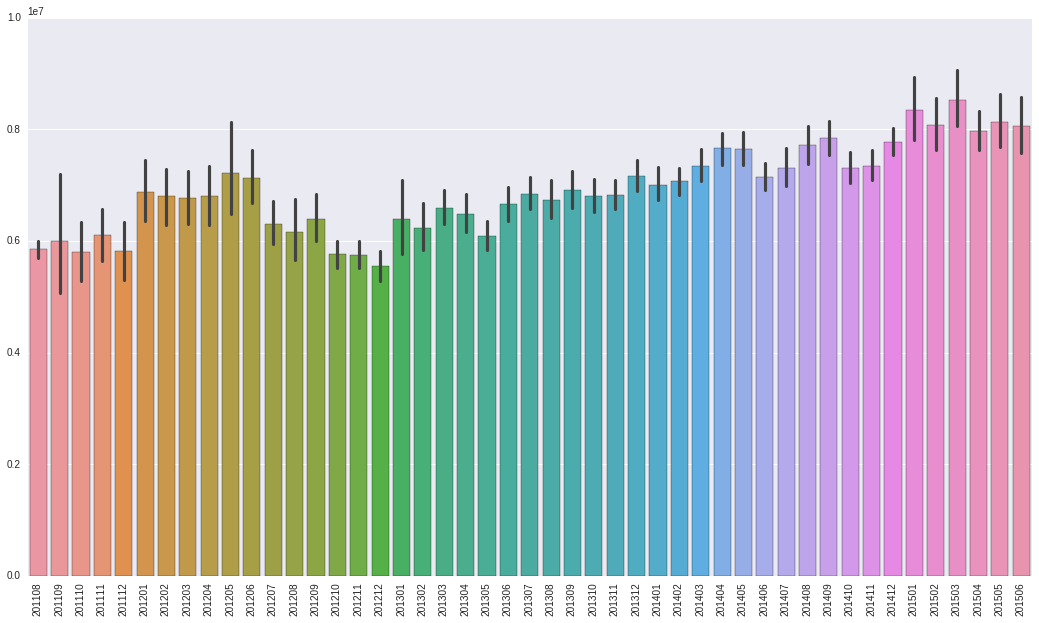

In [117]:
train.groupby("yearmonth").aggregate(np.mean).reset_index()
plt.figure(figsize= (18,10))
plt.xticks(rotation="vertical")
sns.barplot(train["yearmonth"].values, train["price_doc"].values)

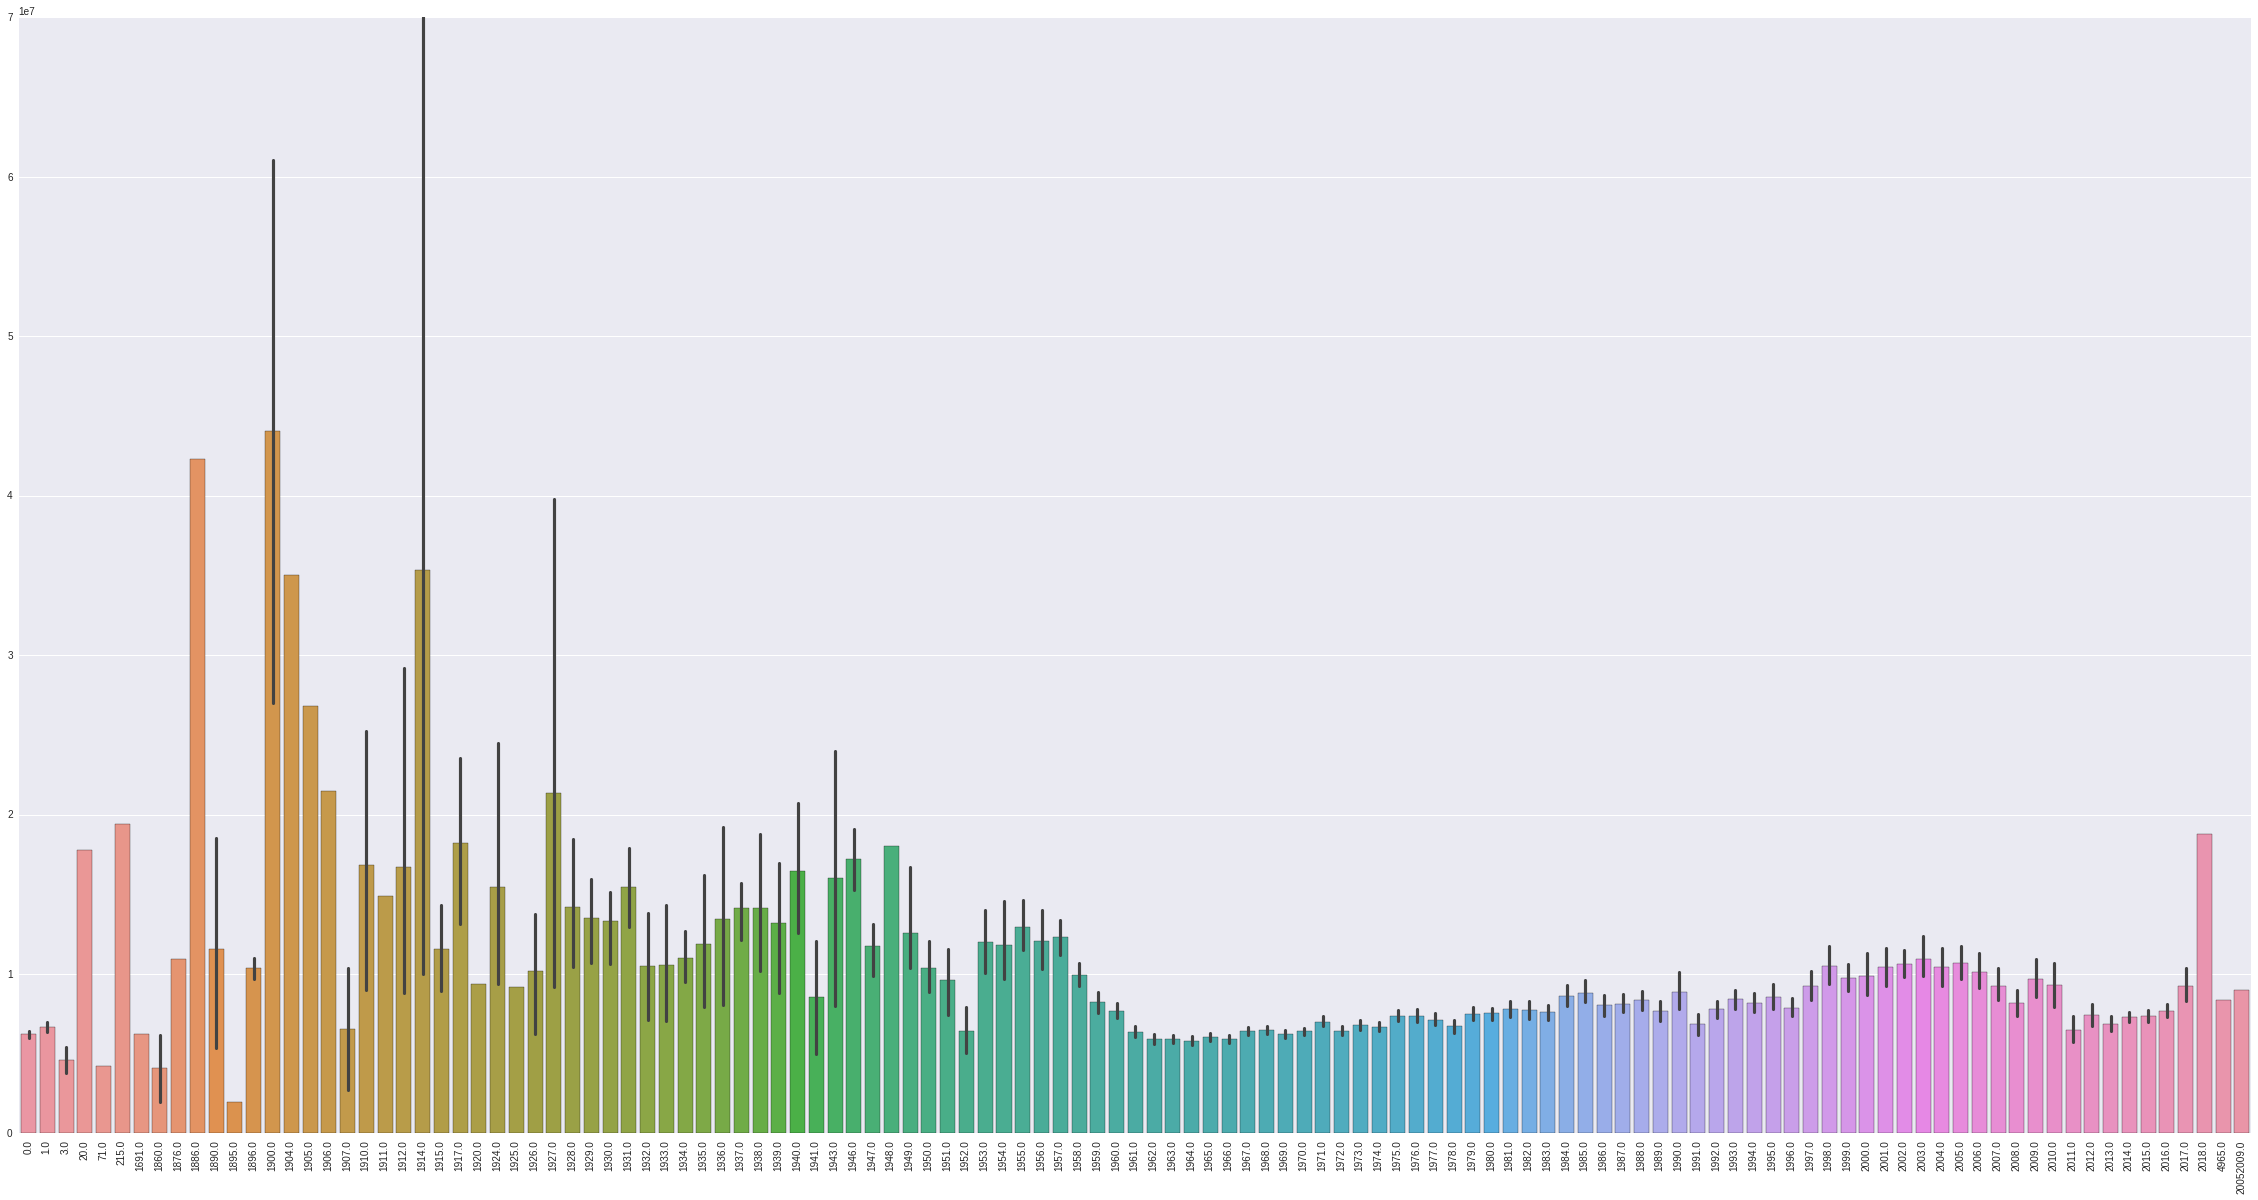

In [122]:
train.groupby("build_year").aggregate(np.mean).reset_index()
plt.figure(figsize= (40,20))
plt.xticks(rotation="vertical")
sns.barplot(train["build_year"].values, train["price_doc"].values)

### As we can see in the plot above, there are many incorrect values in the build year feature

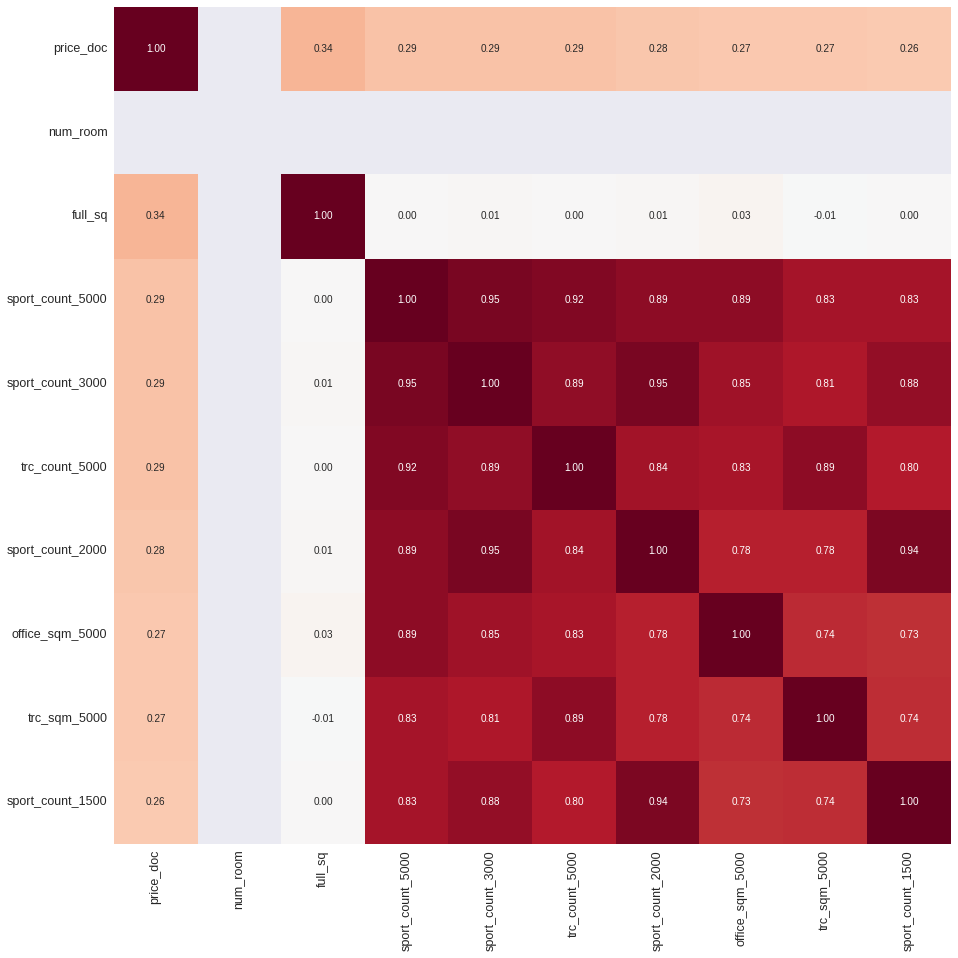

In [140]:
corr = train.corr()

cols = corr.nlargest(10, "price_doc")["price_doc"].index

cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

### This is the correlation matrix 

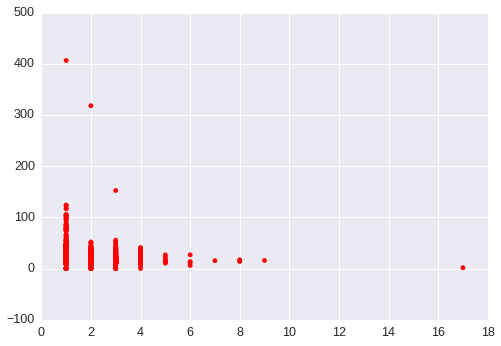

In [141]:
small_train = train.dropna()
square_per_room = small_train["life_sq"]/small_train["num_room"]

plt.scatter(small_train["num_room"],square_per_room,color="red")